## Summary
- Drop columns that has high amounts of zeros and missing values (> 5% ot total)
- Decided to drop forecast columns since not sure how accurate the values are in future
- Decided not to use the other historical energy and power data since too many zeros

In [194]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns

In [195]:
# Show plots in jupyter notebook
%matplotlib inline

In [196]:
# Set plot style
sns.set(color_codes=True)

In [197]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

### Load the Data

In [198]:
train = pd.read_csv('Clean_train_data.csv')

In [199]:
train.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,1,1096,0.106385
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,1,0.00,16.38,16.38,1,18.89,6,13.800,0,2566,0.106385
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,1,0.00,28.60,28.60,1,6.60,6,13.856,0,2192,0.106385
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,1,0.00,30.22,30.22,1,25.46,6,13.200,0,2192,0.053712
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,1,1052.37,-3.18,-3.18,1,823.18,6,75.000,0,2192,0.106385


In [200]:
train.shape

(14459, 22)

In [201]:
train['has_gas'].value_counts()

1    14459
Name: has_gas, dtype: int64

Since there is no info in the has_gas column, we will delete it.

In [202]:
train = train.drop('has_gas', 1)

In [203]:
train = train.drop('id', 1)

In [204]:
train.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1,1096,0.106385
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0,2566,0.106385
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0,2192,0.106385
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0,2192,0.053712
4,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,1052.37,-3.18,-3.18,1,823.18,6,75.000,0,2192,0.106385


In [205]:
train['churn'].value_counts()

0    13053
1     1406
Name: churn, dtype: int64

In [206]:
train['forecast_discount_energy'].value_counts()

0.000000     14344
0.991547       112
12.000000        1
10.000000        1
5.000000         1
Name: forecast_discount_energy, dtype: int64

As we can see in the energy forecast discount column, there are very few discounts in the energy price for all the consumers. This gives us very few feedback about if the churned customers are leaving because of the energy pricing.

In [207]:
train.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded
cons_12m,1.000000,0.494751,0.949705,0.216151,0.230278,-0.001719,0.052869,-0.003562,0.149889,-0.066361,0.219154,-0.081936,-0.081660,0.332708,0.174081,0.003033,0.093942,-0.054304,-0.022422,-0.259712
cons_gas_12m,0.494751,1.000000,0.510623,0.102845,0.124798,0.014067,0.045208,-0.015885,0.076018,-0.051875,0.119876,-0.035920,-0.035656,0.281924,0.093251,-0.011336,0.067652,-0.043700,-0.013018,-0.080784
cons_last_month,0.949705,0.510623,1.000000,0.188509,0.243756,-0.002902,0.043099,0.005052,0.134945,-0.055599,0.235585,-0.071632,-0.071264,0.410762,0.157228,-0.000801,0.077322,-0.051697,-0.023401,-0.242220
forecast_cons_12m,0.216151,0.102845,0.188509,1.000000,0.720445,-0.003625,0.311104,-0.291893,0.298853,-0.167749,0.696080,-0.241360,-0.240746,0.039227,0.933540,0.070938,0.477949,0.001984,0.052905,-0.089963
forecast_cons_year,0.230278,0.124798,0.243756,0.720445,1.000000,-0.007513,0.361383,-0.313533,0.355227,-0.155031,0.979696,-0.172028,-0.171841,0.054644,0.681821,0.080849,0.423470,-0.009679,0.065385,-0.078662
forecast_discount_energy,-0.001719,0.014067,-0.002902,-0.003625,-0.007513,1.000000,-0.022057,0.018010,0.010104,0.002287,-0.004149,0.017249,0.017265,-0.000534,-0.008710,-0.028100,-0.008048,0.042185,-0.030255,0.014882
forecast_meter_rent_12m,0.052869,0.045208,0.043099,0.311104,0.361383,-0.022057,1.000000,-0.849611,0.767357,-0.387818,0.292650,0.107352,0.107041,-0.008278,0.392843,0.096901,0.583998,0.033121,0.085483,0.003306
forecast_price_energy_p1,-0.003562,-0.015885,0.005052,-0.291893,-0.313533,0.018010,-0.849611,1.000000,-0.532338,0.265263,-0.246908,-0.053657,-0.053489,0.015038,-0.364082,-0.080809,-0.571644,-0.037967,-0.073693,-0.058555
forecast_price_energy_p2,0.149889,0.076018,0.134945,0.298853,0.355227,0.010104,0.767357,-0.532338,1.000000,-0.365530,0.293667,0.081294,0.081376,0.022197,0.364335,0.110084,0.492745,0.021372,0.096746,-0.078870
forecast_price_pow_p1,-0.066361,-0.051875,-0.055599,-0.167749,-0.155031,0.002287,-0.387818,0.265263,-0.365530,1.000000,-0.145701,-0.311833,-0.310847,-0.020409,-0.220314,0.051268,-0.346307,-0.018241,0.066984,0.026431


## Applying a Logistic Regression Model

In [208]:
train_columns = train.columns.values.tolist()

In [209]:
train_columns

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'churn',
 'duration',
 'channel_sales_encoded']

In [210]:
Y = ['churn']
X = [v for v in train_columns if v not in Y]
X

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'duration',
 'channel_sales_encoded']

### Model Feature Selection

In [211]:
n = 12 #Variable Numbers

In [212]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [213]:
lr = LogisticRegression()

In [214]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(train[X], train[Y].values.ravel())

C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [215]:
print(rfe.support_)

[False False False False False  True  True  True False  True  True  True
  True  True  True  True  True  True False]


In [216]:
print(rfe.ranking_)

[7 6 5 4 2 1 1 1 8 1 1 1 1 1 1 1 1 1 3]


In [217]:
z = zip(X,rfe.support_,rfe.ranking_)

In [218]:
list(z)

[('cons_12m', False, 7),
 ('cons_gas_12m', False, 6),
 ('cons_last_month', False, 5),
 ('forecast_cons_12m', False, 4),
 ('forecast_cons_year', False, 2),
 ('forecast_discount_energy', True, 1),
 ('forecast_meter_rent_12m', True, 1),
 ('forecast_price_energy_p1', True, 1),
 ('forecast_price_energy_p2', False, 8),
 ('forecast_price_pow_p1', True, 1),
 ('imp_cons', True, 1),
 ('margin_gross_pow_ele', True, 1),
 ('margin_net_pow_ele', True, 1),
 ('nb_prod_act', True, 1),
 ('net_margin', True, 1),
 ('num_years_antig', True, 1),
 ('pow_max', True, 1),
 ('duration', True, 1),
 ('channel_sales_encoded', False, 3)]

We will choose the variables that contain "True", this will be the best features for the prediction.

In [219]:
cols = ['forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_pow_p1','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin','num_years_antig','pow_max','duration']

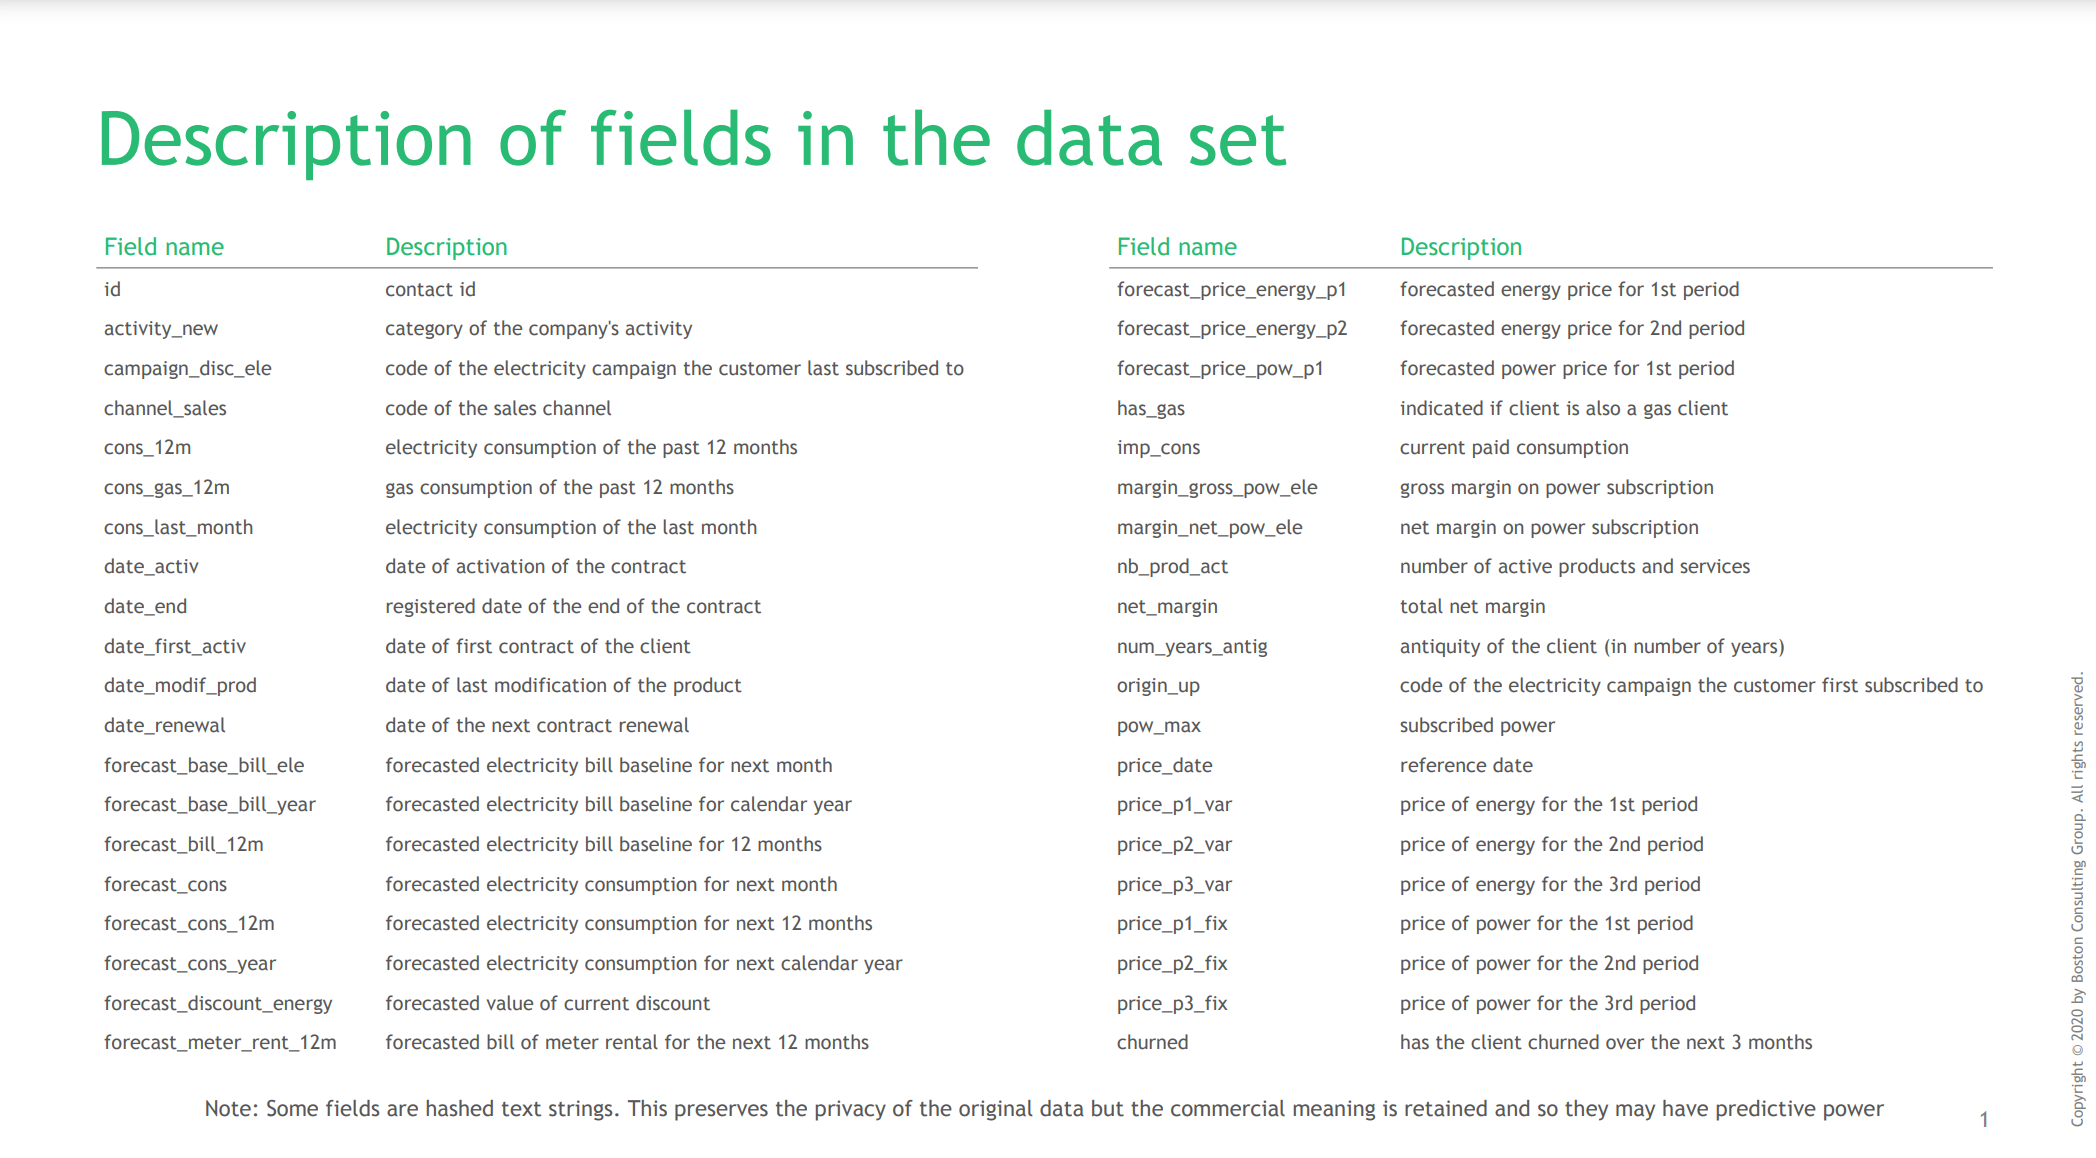

In [220]:
from IPython.display import Image
Image(filename='Features.png')

In [221]:
X = train[cols]
Y = train["churn"]

## Model Implementation with statsmodels.api

In [222]:
import statsmodels.api as sm

In [223]:
logit_model = sm.Logit(Y, X) #(Y = Variable to predict, X = Predictive Variables)

In [224]:
result = logit_model.fit()

         Current function value: 0.308999
         Iterations: 35


C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [225]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.031     
Dependent Variable:       churn                AIC:                  8959.6414 
Date:                     2021-10-28 18:42     BIC:                  9050.5902 
No. Observations:         14459                Log-Likelihood:       -4467.8   
Df Model:                 11                   LL-Null:              -4612.1   
Df Residuals:             14447                LLR p-value:          2.2713e-55
Converged:                0.0000               Scale:                1.0000    
No. Iterations:           35.0000                                              
-------------------------------------------------------------------------------
                          Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
-------------------------------------------------------------------------------
forecast_discount_energy   0.4426    0.1551  2.8547 0.0043     0.1387    0.7465
forecast_meter_rent_12m   -0.0017    0.0007 -2.3760 0.0175    -0.0031   -0.0003
forecast_price_energy_p1 -17.0604    2.2447 -7.6004 0.0000   -21.4598  -12.6609
forecast_price_pow_p1      0.0136    0.0074  1.8569 0.0633    -0.0008    0.0281
imp_cons                  -0.0003    0.0002 -1.7780 0.0754    -0.0006    0.0000
margin_gross_pow_ele     -14.7347 1619.3167 -0.0091 0.9927 -3188.5370 3159.0677
margin_net_pow_ele        14.7656 1619.3167  0.0091 0.9927 -3159.0367 3188.5680
nb_prod_act               -0.1469    0.0496 -2.9616 0.0031    -0.2441   -0.0497
net_margin                 0.0012    0.0002  5.9274 0.0000     0.0008    0.0016
num_years_antig           -0.3343    0.0637 -5.2502 0.0000    -0.4590   -0.2095
pow_max                   -0.0275    0.0046 -5.9519 0.0000    -0.0366   -0.0184
duration                   0.0005    0.0002  2.9564 0.0031     0.0002    0.0008
===============================================================================

"""

## Model Implementation with scikit-learn

In [226]:
from sklearn import linear_model

In [227]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y) 

C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [228]:
logit_model.score(X,Y)

0.9027595269382391

In [229]:
1-Y.mean()

0.9027595269382391

In [230]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,forecast_discount_energy,[0.06066259141708948]
1,forecast_meter_rent_12m,[0.0012976538029225277]
2,forecast_price_energy_p1,[-0.006769021933949551]
3,forecast_price_pow_p1,[-0.03544888360791199]
4,imp_cons,[-0.0003289637981532655]
5,margin_gross_pow_ele,[0.00021770768872885247]
6,margin_net_pow_ele,[0.02451362377349451]
7,nb_prod_act,[-0.2616949123027275]
8,net_margin,[0.0010497084926962292]
9,num_years_antig,[-0.1815375672027103]


As we can see in the past dataframe, the duration column has the biggest coefficient for the churning prediction, with this info we can visualize duration time of each customer aquiring the energy services.

Lets create a "Retention" column which will help us to visulize the number of years each client had the service.

In [231]:
train['retention'] = train['duration'] // 365

In [232]:
train['retention'].value_counts()

6     3525
4     3459
5     2847
7     2780
3     1224
11     191
12     145
8      116
2       49
13      45
9       40
10      36
15       1
1        1
Name: retention, dtype: int64

In [248]:
train.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded,retention
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1,1096,0.106385,3
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0,2566,0.106385,7
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0,2192,0.106385,6
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0,2192,0.053712,6
4,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,1052.37,-3.18,-3.18,1,823.18,6,75.000,0,2192,0.106385,6


Text(0, 0.5, 'Number of Clients')

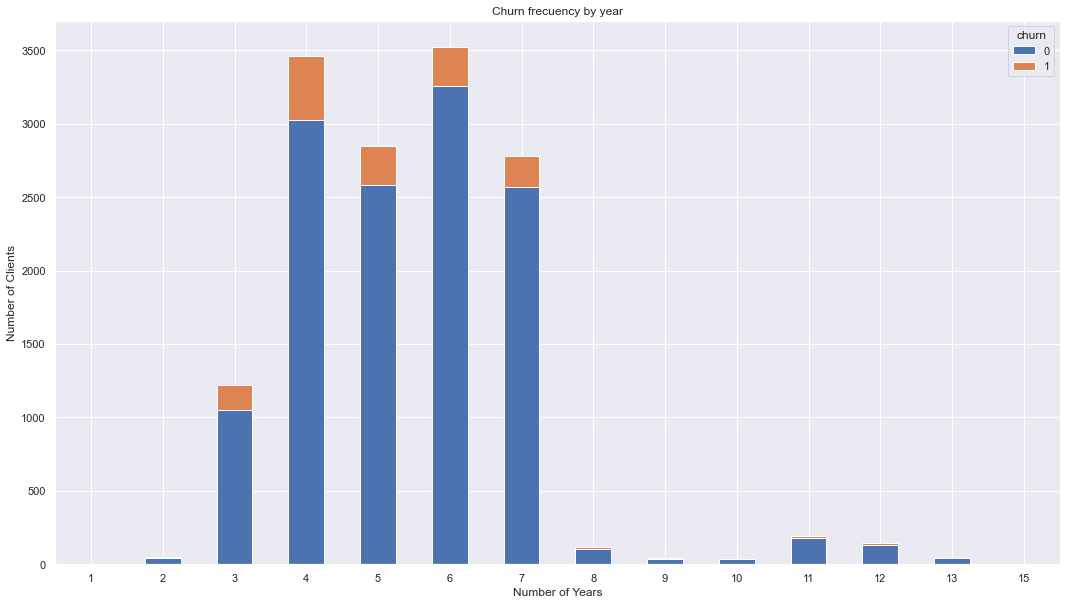

In [327]:
%matplotlib inline
table = pd.crosstab(train.retention, train.churn)

tab_plot = table.plot(kind="bar", figsize=(18,10), stacked=True, rot=0, title= "Tenure")

plt.title("Churn frecuency by year")
plt.xlabel("Number of Years")
plt.ylabel("Number of Clients")

In [329]:
tab_plot.figure.savefig('Churn_frequency.png')

Text(0.5, 1.0, 'Client Retention')

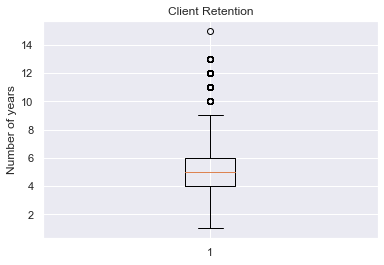

In [262]:
plt.boxplot(train["retention"])
plt.ylabel("Number of years")
plt.title("Client Retention")

It looks like the average clients churn between years 3-7, we should study these cases and analyze the possible reason of customer churning.

### Studying the dataset of churned customers (Period: 3 - 7 years)

In [267]:
churned_customers = train[(train["retention"]>2) & (train["retention"]<8)]
churned_customers.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded,retention
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,0.00,25.44,25.44,2,678.99,3,43.648,1,1096,0.106385,3
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0.00,16.38,16.38,1,18.89,6,13.800,0,2566,0.106385,7
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0.00,28.60,28.60,1,6.60,6,13.856,0,2192,0.106385,6
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0.00,30.22,30.22,1,25.46,6,13.200,0,2192,0.053712,6
4,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,1052.37,-3.18,-3.18,1,823.18,6,75.000,0,2192,0.106385,6


In [270]:
churned_customers.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded,retention
count,1.383500e+04,1.383500e+04,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000,13835.000000
mean,1.935586e+05,3.282879e+04,19358.634333,1826.241047,1302.006361,0.009692,59.727289,0.136186,0.049573,43.502531,140.037691,21.278380,21.263706,1.338200,177.258796,4.810553,17.060334,0.098085,1940.403614,0.097015,5.229707
std,6.750020e+05,1.829096e+05,75760.440509,2047.201087,2242.650450,0.164397,57.750801,0.018297,0.047805,2.995081,231.710851,13.373599,13.411152,1.485425,187.767644,1.197633,9.381698,0.297440,460.104132,0.018251,1.268779
min,-1.795700e+04,-3.037000e+03,-91386.000000,-3530.370000,-9847.000000,0.000000,-114.910000,0.095022,0.000000,35.555768,-988.160000,-46.020000,-55.080000,1.000000,-746.450000,2.000000,1.000000,0.000000,1095.000000,0.000000,3.000000
25%,5.663500e+03,0.000000e+00,0.000000,502.665000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,12.820000,12.820000,1.000000,49.810000,4.000000,12.180000,0.000000,1461.000000,0.097826,4.000000
50%,1.407000e+04,0.000000e+00,781.000000,1101.910000,309.000000,0.000000,18.620000,0.143166,0.083816,44.311378,36.640000,20.970000,20.970000,1.000000,110.180000,5.000000,13.856000,0.000000,1827.000000,0.106385,5.000000
75%,4.244200e+04,0.000000e+00,3511.000000,2348.485000,1677.500000,0.000000,130.670000,0.145884,0.098837,44.311378,187.235000,28.200000,28.200000,1.000000,234.755000,6.000000,17.387500,0.000000,2222.000000,0.106385,6.000000
max,6.286272e+06,4.188440e+06,771203.000000,14395.490000,18925.000000,12.000000,300.850000,0.208313,0.136336,59.051284,1669.910000,93.290000,93.290000,32.000000,1274.040000,8.000000,85.760000,1.000000,2915.000000,0.106385,7.000000


In [271]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded,retention
count,1.445900e+04,1.445900e+04,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000
mean,1.916156e+05,3.229662e+04,19041.747839,1907.173802,1382.226710,0.009548,62.106980,0.135368,0.051045,43.503613,147.051306,21.125685,21.111644,1.338059,184.533830,5.020472,17.411172,0.097240,2015.497683,0.097240,5.431980
std,6.693297e+05,1.803359e+05,74944.979620,2135.571422,2335.968621,0.161650,58.440468,0.018510,0.047778,3.188082,238.533633,13.577770,13.613008,1.459595,193.393482,1.620179,9.798594,0.296295,605.945933,0.018148,1.669626
min,-1.795700e+04,-3.037000e+03,-91386.000000,-3530.370000,-9847.000000,0.000000,-114.910000,0.095022,0.000000,35.555768,-988.160000,-46.020000,-55.080000,1.000000,-746.450000,1.000000,1.000000,0.000000,365.000000,0.000000,1.000000
25%,5.828500e+03,0.000000e+00,0.000000,513.550000,0.000000,0.000000,16.220000,0.115753,0.000000,40.606701,0.000000,12.720000,12.700000,1.000000,51.265000,4.000000,12.500000,0.000000,1461.000000,0.097826,4.000000
50%,1.470000e+04,0.000000e+00,836.000000,1146.700000,347.000000,0.000000,19.230000,0.142881,0.084143,44.311378,40.840000,20.640000,20.640000,1.000000,113.890000,5.000000,13.856000,0.000000,1872.000000,0.106385,5.000000
75%,4.446750e+04,0.000000e+00,3672.000000,2467.985000,1816.000000,0.000000,131.260000,0.145789,0.098837,44.311378,198.855000,28.200000,28.200000,1.000000,247.840000,6.000000,19.450000,0.000000,2386.000000,0.106385,6.000000
max,6.286272e+06,4.188440e+06,771203.000000,14395.490000,20288.000000,12.000000,300.850000,0.208313,0.136336,59.051284,1669.910000,93.290000,93.290000,32.000000,1274.040000,15.000000,85.760000,1.000000,5800.000000,0.106385,15.000000


If we compare the initial dataset with the dataset that contains the most churned customers (Retention: 3-7 years), at first sight there are not so many diferences. We will heve to create a logistic regression to have a better understanding of the new churned_customers dataset.

In [272]:
churned_customer_columns = churned_customers.columns.values.tolist()
churned_customer_columns

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'churn',
 'duration',
 'channel_sales_encoded',
 'retention']

In [273]:
Y = ['churn']
X = [v for v in churned_customer_columns if v not in Y]
X

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'duration',
 'channel_sales_encoded',
 'retention']

In [275]:
n = 12 #Variable Numbers

In [276]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [277]:
lr = LogisticRegression()

In [283]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(churned_customers[X], churned_customers[Y].values.ravel())

C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [284]:
print(rfe.support_)

[False False False False False False  True  True False  True  True  True
  True  True  True  True  True  True False  True]


In [285]:
print(rfe.ranking_)

[5 4 8 3 2 7 1 1 9 1 1 1 1 1 1 1 1 1 6 1]


In [286]:
z = zip(X,rfe.support_,rfe.ranking_)

In [287]:
list(z)

[('cons_12m', False, 5),
 ('cons_gas_12m', False, 4),
 ('cons_last_month', False, 8),
 ('forecast_cons_12m', False, 3),
 ('forecast_cons_year', False, 2),
 ('forecast_discount_energy', False, 7),
 ('forecast_meter_rent_12m', True, 1),
 ('forecast_price_energy_p1', True, 1),
 ('forecast_price_energy_p2', False, 9),
 ('forecast_price_pow_p1', True, 1),
 ('imp_cons', True, 1),
 ('margin_gross_pow_ele', True, 1),
 ('margin_net_pow_ele', True, 1),
 ('nb_prod_act', True, 1),
 ('net_margin', True, 1),
 ('num_years_antig', True, 1),
 ('pow_max', True, 1),
 ('duration', True, 1),
 ('channel_sales_encoded', False, 6),
 ('retention', True, 1)]

In [306]:
cols = ['forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_pow_p1','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin','num_years_antig','pow_max']

In [307]:
X = churned_customers[cols]
Y = churned_customers["churn"]

In [308]:
#Model Implementation with sklearn
from sklearn import linear_model

In [309]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y) 

C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [310]:
logit_model.score(X,Y)

0.9019154318756776

In [311]:
1-Y.mean()

0.9019154318756777

In [312]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,forecast_meter_rent_12m,[0.0012763028182629177]
1,forecast_price_energy_p1,[-0.006813226510295816]
2,forecast_price_pow_p1,[-0.030084260089767306]
3,imp_cons,[-0.00039612876032995984]
4,margin_gross_pow_ele,[0.0022037016920908653]
5,margin_net_pow_ele,[0.024645366027854797]
6,nb_prod_act,[-0.16306330038922662]
7,net_margin,[0.0010714839362510672]
8,num_years_antig,[-0.22823726484748888]
9,pow_max,[-0.026012356250885695]


We can observe that there is no determining feature for the users churn in this dataframe, therefore the hypothesis that the power liberalization affected in the churning of customers may be true, but there is no certainty if this is true.

In [321]:
#Contingency table of Churned Customers per year
contingency_table = pd.crosstab(train['retention'], train['churn'])
contingency_table

churn,0,1
retention,,
1,1,0
2,41,8
3,1048,176
4,3028,431
5,2580,267
6,3254,271
7,2568,212
8,105,11
9,39,1


In [323]:
#Percentage of Churned customers per year
contingency_table.astype('float').div(contingency_table.sum(axis=1), axis=0)*100

churn,0,1
retention,,
1,100.000000,0.000000
2,83.673469,16.326531
3,85.620915,14.379085
4,87.539751,12.460249
5,90.621707,9.378293
6,92.312057,7.687943
7,92.374101,7.625899
8,90.517241,9.482759
9,97.500000,2.500000


# Conclusion

By analyzing the customer attrition, we suggest to focus on their marketing strategy to improve the customer retention over the first 3 - 7 years (specially years 2 - 4), since this is the period in which customers tend to churn the most. After this period of time, there is a customer churn decrease of almost 9%. 

This is important because it may seem that PowerCo is loosing a significant ammount of customers but by improving the customer retention in this critical period of time (years 2 - 4) , the customer churn will eventually decrease. We can appreciate that the percentage of the churned customers in years 2 - 4 has a mean of 13%, while years 5 - 8 have 8%, and after year 8 only 5% of the customers churn.

### Logistic Model Validation

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [238]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [239]:
probs = lm.predict_proba(X_test)

In [240]:
probs

array([[0.96331422, 0.03668578],
       [0.88062846, 0.11937154],
       [0.90414228, 0.09585772],
       ...,
       [0.88998021, 0.11001979],
       [0.94497421, 0.05502579],
       [0.85745422, 0.14254578]])

In [241]:
prediction = lm.predict(X_test)

In [242]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1 #Threshold = Relation/Percentage of posible churners
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
#If the probability is bigger than the threshold, it will be categorized as 1.
prob_df.head()

,0,prediction
0,0.036686,0
1,0.119372,1
2,0.095858,0
3,0.093800,0
4,0.117815,1


In [244]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,2444
1,1894


In [245]:
1894/len(prob_df)*100

43.660673121254035

In [246]:
threshold = 0.15 #More permissive Threshold 15%
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,3945
1,393


In [247]:
393/len(prob_df)*100

9.059474412171507

In [326]:
#Exporting the file
train.to_csv('Module4_data.csv',index=False)